# Projet Trottinettes

**MDI230 - Files d'attente**

S2-P4 2022/23

* MONTES, Julia Soledad.
* PARAFATI, Mauro.
* PONS, Bruno.

## 1. Modalités

Le travail peut se faire en monôme, binôme, ou trinôme. Les groupes ne peuvent pas changer pendant la durée du projet ou d’un projet à l’autre. Vous pouvez faire la simulation dans le langage de votre choix, nous vous conseillons Python ou Matlab. Une attention toute particulière sera donnée à la rédaction de vos rapports. Par exemple, un bout de code Python non explicité par ailleurs ne donnera aucun point. Le format privilégié est Jupyter notebook qui donne la possibilité d’intégrer à la fois le code Python, les calculs théoriques en Markdown, et la rédaction. Nous rappelons que le plagiat est interdit. Tout plagiat partiel ou total entre étudiants de l’UE, ou sur des ressources extérieures sera sanctionné par la note de 0, et pourra faire l’objet d’un signalement à la Direction de l’Enseignement pour une sanction plus forte. L’inscription au groupe et les rendus se font exclusivement sur le site pédagogique eCampus de l’UE. La date limite pour le rendu est le 27 juin 2023 à 23h59.

## 2. Présentation

On considère un système de **trottinettes électriques** en libres services :

* Les trottinettes peuvent être empruntées et déposées n’importe où.
* Lorsqu’une trottinette a sa batterie vide, un prestataire vient la chercher pour la recharger.
* Lorsqu’une trottinette est en panne, un technicien vient la chercher pour la réparer.
* Il y a une flotte de $N$ trottinettes.
* Le taux d’emprunt moyen est de $λ$ trottinettes par minute.
* On note $t_{trajet}$ le temps moyen d’un trajet par un utilisateur.
* On considère que chaque trottinette a une probabilité $p_{panne}$ de tomber en panne et une probabilité $p_{vide}$ d’avoir sa batterie vide lorsqu’elle est utilisée.
* On suppose qu’une trottinette non utilisée ne peut pas tomber en panne ou avoir une batterie vide. 
* On note enfin $t_{intervention}$ le temps moyen d’intervention d’un prestataire ou d’un technicien, $t_{recharge}$ le temps moyen de recharge de la batterie d’une trottinette, et $t_{réparation}$ le temps moyen de réparation pour une trottinette.
* On considère qu’il y a suffisamment de prestataires et de techniciens pour chercher, charger et réparer les trottinettes qui en ont besoin simultanément.
* On suppose que les trottinettes sont toujours réparables.

## 3. Valeurs numériques des paramètres

Les valeurs numériques des paramètres sont données ci-dessous :

* $N = 100$
* $λ = 0.1 \text{ min}^{−1}$
* $t_{trajet} = 5 \text{ min}$
* $p_{panne} = 0.01$
* $p_{vide} = 0.1$
* $t_{intervention} = 30 \text{ min}$
* $t_{recharge} = 240 \text{ min}$
* $t_{réparation} = 720 \text{ min}$

In [5]:
N = 100 #Number of scooters
λ = 0.1  #Average borrowing rate per minute (in min ^-1)
t_journey = 5 #Average journey time by one user (in min)
p_breakdown = 0.01 #Probability of breakdown
p_empty = 0.1 #Probability of having its battery empty while it is being used
t_intervention = 30 #Average time of intervention taken  by a service provider or technician (in min)
t_recharge = 240 #Average time taken to recharge the battery of a scooter (in min)
t_repair = 720 #Average repair time for a scooter (in min)

In [6]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statistics 
import graphviz

## 4. Travail à effectuer

### 1. Proposez un processus de Markov permettant de modéliser ce système à partir d’un modèle vu en cours. Vous préciserez l’espace d’état et les différents paramètres du système, vous pouvez vous aider d’un diagramme de transitions.

To model the self-service electric scooter system as a Markov process we used the colonies model. Where each colony, represents the different state a scooter can be in. The possible states in this system are as follows:

- Available : The scooter is available for borrowing and is in working condition.
- In use: The scooter has been borrowed and is currently in use by a user.
- Broken down: The scooter has encountered a breakdown and requires repair.
- Battery empty: The scooter's battery has been depleted and needs to be recharged.

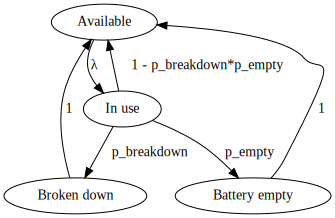

In [3]:
dot = graphviz.Digraph()

# Define the nodes
dot.node('A', 'Available')
dot.node('U', 'In use')
dot.node('B', 'Broken down')
dot.node('E', 'Battery empty')

# Define the edges with labels
dot.edge('A', 'U', 'λ')
dot.edge('U', 'A', '1 - p_breakdown*p_empty')
dot.edge('U', 'B', 'p_breakdown')
dot.edge('U', 'E', 'p_empty')
dot.edge('B', 'A', '1')
dot.edge('E', 'A', '1')

# Render the graph
dot

<!-- To model the self-service electric scooter system for N scooters, we can extend the Markov process to incorporate multiple scooters. The state space will now include the states for each individual scooter. Let's denote the state space as E, where each state represents the status of all N scooters. -->
<!-- REWRITE THE ABOVE -->

To model the self-service electric scooter system for N scooters, we can use the model of Colonies.

The state space E can be defined as follows:

$$E = \{n = (n_1, n_2, n_3, n_4) | \sum_{j=1}^{4} n_j = N \}$$

Where:

There are 4 colonies and $n_j$ represents the number of scooters in a certain colony, each colony is described below:
- $1$: Colony where scooter is available.
- $2$: Colony where scooter is in use.
- $3$: Colony where scooter is broken down.
- $4$: Colony where scooter has an empty battery.

### 2. Calibrez votre modèle en explicitant vos paramètres en fonction des données de l’énoncé.
<!-- Calibrate your model by explaining your parameters based on the data in the statement. -->

In [7]:
## Transition rates
# q(n, Ti,j(n)) = phi_i(n_i) * lambda_ij
# phi_1(n_1) = n_1
# phi_2(n_2) = n_2
# phi_3(n_3) = n_3
# phi_4(n_4) = n_4
lambda_12 = λ
lambda_21 = 1/t_journey * (1 - p_breakdown * p_empty)
lambda_23 = 1/t_intervention * p_breakdown
lambda_24 = 1/t_intervention * p_empty
lambda_31 = 1/t_repair
lambda_41 = 1/t_recharge

###  3. Donnez l’expression de la probabilité stationnaire théorique de votre modèle.

By theorem:

Theorem 2.4

The equilibrium distribution for a closed migration process is
$$
\pi(n)=K^{-1} \prod_{j=1}^J \frac{\alpha_j^{n_j}}{\prod_{r=1}^{n_j} \phi_j(r)}, \quad n \in E .
$$
Here, $K$ is a normalizing constant, chosen so the distribution sums to 1 , and $\left(\alpha_j\right)$ are the solution to the traffic equations displayed below.

$\begin{gathered}\alpha_j>0, \quad \sum_j \alpha_j=1, \\ \alpha_j \sum_k \lambda_{j k}=\sum_k \alpha_k \lambda_{k j}, \quad j=1,2, \ldots, J .\end{gathered}$

In [20]:
A = np.array([[lambda_12, -lambda_21, -lambda_31 ,-lambda_41],
              [-lambda_12,lambda_21 + lambda_23 + lambda_24, 0 ,0],
              [0,-lambda_23,lambda_31,0],
              [lambda_24,0,lambda_24,lambda_24 + lambda_41]] )
alphas = np.zeros(4)

alphas = np.linalg.solve(A, np.array([0,0,0,lambda_24]))

print(A)
print(alphas)

[[ 0.1        -0.1998     -0.00138889 -0.00416667]
 [-0.1         0.20346667  0.          0.        ]
 [ 0.         -0.00033333  0.00138889  0.        ]
 [ 0.00333333  0.          0.00333333  0.0075    ]]
[0.49934555 0.24541885 0.05890052 0.19633508]


### 4. Simulez les trajectoires de votre modèle sur au moins 100h.

In [24]:
n_1 = N
n_2 = 0
n_3 = 0
n_4 = 0
state = np.array([n_1, n_2, n_3, n_4])
transition_matrix = np.array([[0,lambda_12*n_1,0,0],
                              [lambda_21*n_2,0,lambda_23*n_2,lambda_24*n_2],
                              [lambda_31*n_3,0,0,0],
                              [lambda_41*n_4,0,0,0]])
for i in range(4):
    n_1 = np.random
state = np.random.choice(state, size=(1,4), p=transition_matrix[0])

ValueError: probabilities do not sum to 1

In [ ]:
timesteps = np.arange(0, 100*60, 1)
initial_state = np.array([N, 0, 0, 0])

states = []
states.append(initial_state)

for timestep in timesteps:
    state = np.random.choice(states, size=(1,4), p=transition_matrix)
    state = np.random.choice(states, p=transition_matrix[states[-1]])
    states.append(states[-1])



### 5. Validez votre simulation grâce aux résultats théoriques. Pour cela, on limitera le nombre de trottinettes à $N = 2$. Vous devrez proposer deux manières d’approcher la probabilité stationnaire par vos simulations. On rappelle qu’une simulation est valide si les résultats théoriques sont dans l’intervalle de confiance des résultats simulés.

### 6. Que faut-il changer au modèle si on considère finalement qu’il y a un nombre fini de prestataires $n_p$ et un nombre fini de techniciens $n_t$ ?